In [3]:
import numpy as np
from skfem import *

from skfem.helpers import dot, sym_grad, jump, mul
from skfem.io.json import from_file
from pathlib import Path
import pandas as pd 
import json 
import matplotlib.pyplot as plt 
from skfem.mesh.mesh  import Mesh
from skfem.io.meshio import from_file
from stl import mesh
from meshio.stl import _stl
import stl
from stl import mesh
from array import array
from skfem.visuals.matplotlib import plot, draw
import pyvista as pv

In [5]:
def read_stl(file_path):
    points = []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Iterate through the lines of the file
        for line in lines:
            # Split the line into its components
            components = line.split()

            # Check if the line represents a vertex (vertex lines start with "vertex")
            if len(components) >= 4 and components[0] == 'vertex':
                # Extract the x, y, and z coordinates of the vertex
                x = float(components[1])
                y = float(components[2])
                z = float(components[3])

                # Append the coordinates to the list of points
                points.append((x, y, z))

    return points

def plot_points_3d(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from points
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    z = [point[2] for point in points]

    # Plot points
    ax.scatter(x, y, z, c='r', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

In [6]:
filepath = 'STL_Files/egg.stl'
newfilepath = 'STL_Files/newegg.stl'
your_mesh = mesh.Mesh.from_file(filepath)
your_mesh.save(newfilepath,mode=stl.Mode.ASCII)


m = read_stl(newfilepath)
#extrahiere die Punkte der Stl FILE dreiecke
object_points = read_stl(newfilepath)

print(object_points)

Punkte = np.array(object_points)







[(-1.3196492, 0.12543207, -1.974513), (-1.2837648, 0.121874414, -2.0120955), (-1.2957683, -0.0045654215, -2.0120952), (-1.2957683, -0.0045654215, -2.0120952), (-1.3320031, -0.0045420676, -1.9745129), (-1.3196492, 0.12543207, -1.974513), (-1.3196492, 0.12543207, -1.974513), (-1.3320031, -0.0045420676, -1.9745129), (-1.3643448, -0.0045199133, -1.9388771), (-1.3643448, -0.0045199133, -1.9388771), (-1.3516781, 0.1286088, -1.9388771), (-1.3196492, 0.12543207, -1.974513), (-1.3196492, 0.12543207, -1.974513), (-1.3516781, 0.1286088, -1.9388771), (-1.332579, 0.26048023, -1.9388771), (-1.332579, 0.26048023, -1.9388771), (-1.3010153, 0.2541793, -1.974513), (-1.3196492, 0.12543207, -1.974513), (-1.3196492, 0.12543207, -1.974513), (-1.3010153, 0.2541793, -1.974513), (-1.265652, 0.24712142, -2.0120955), (-1.265652, 0.24712142, -2.0120955), (-1.2837648, 0.121874414, -2.0120955), (-1.3196492, 0.12543207, -1.974513), (-0.21614428, 0.019679647, 2.7419138), (-0.26444194, 0.02442902, 2.7298522), (-0.2668

C:\Users\AlexP\AppData\Roaming\Python\Python312\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


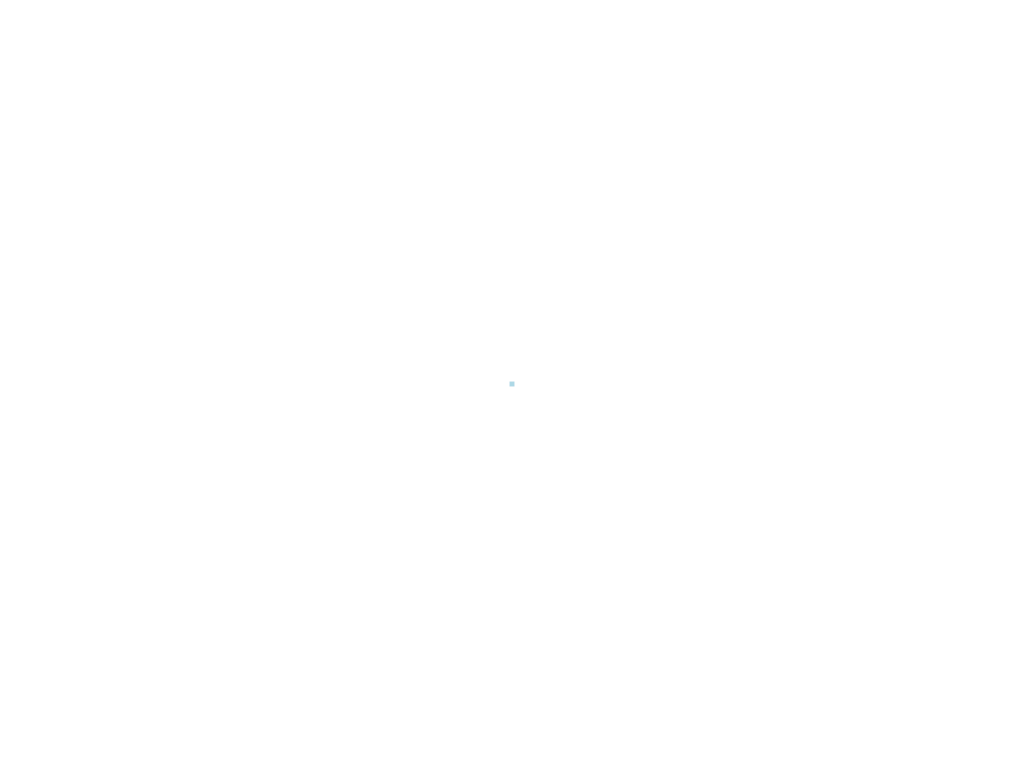

In [7]:
def getBBox(array):
    x_coordinate1 = np.min(array.T[0])
    x_coordinate2 = np.max(array.T[0])
    y_coordinate1 = np.min(array.T[1])
    y_coordinate2 = np.max(array.T[1])
    z_coordinate1 = np.min(array.T[2])
    z_coordinate2 = np.max(array.T[2])
    bbox =          ([x_coordinate1,y_coordinate1,z_coordinate1],#all x-combination
                    [x_coordinate1,y_coordinate2,z_coordinate1],
                    [x_coordinate1,y_coordinate1,z_coordinate2],
                    [x_coordinate2,y_coordinate1,z_coordinate1],#all y-combination
                    [x_coordinate2,y_coordinate1,z_coordinate2],
                    [x_coordinate2,y_coordinate2,z_coordinate1],
                    [x_coordinate1,y_coordinate2,z_coordinate2],#all z-combination
                    [x_coordinate2,y_coordinate2,z_coordinate2])
    return bbox


points = getBBox(Punkte)
newpoints= np.array(points)
liste = np.zeros(shape=(100,3))

x = np.arange(np.min(newpoints.T[0]),np.max(newpoints.T[0]), 100)
y = np.arange(np.min(newpoints.T[1]),np.max(newpoints.T[1]), 100)
z = np.arange(np.min(newpoints.T[2]),np.max(newpoints.T[2]), 100)
 
liste[:,0] = x
liste[:,1] = y
liste[:,2] = z

xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T



p = pv.Plotter()
p.add_mesh(points)
p.show()

In [8]:
def FillVolume(file):
    Volume = ()
    Volume[:0] = np.linspace(np.min(file.T[0]),np.max(file.T[0]), 100)
    
    return volume

C:\Users\AlexP\AppData\Roaming\Python\Python312\site-packages\pyvista\core\utilities\misc.py:207: UserWarning: Encountered issue in callback (most recent call last):
TypeError: callback() missing 1 required positional argument: '_'
  warnings.warn(formatted_exception)
C:\Users\AlexP\AppData\Roaming\Python\Python312\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


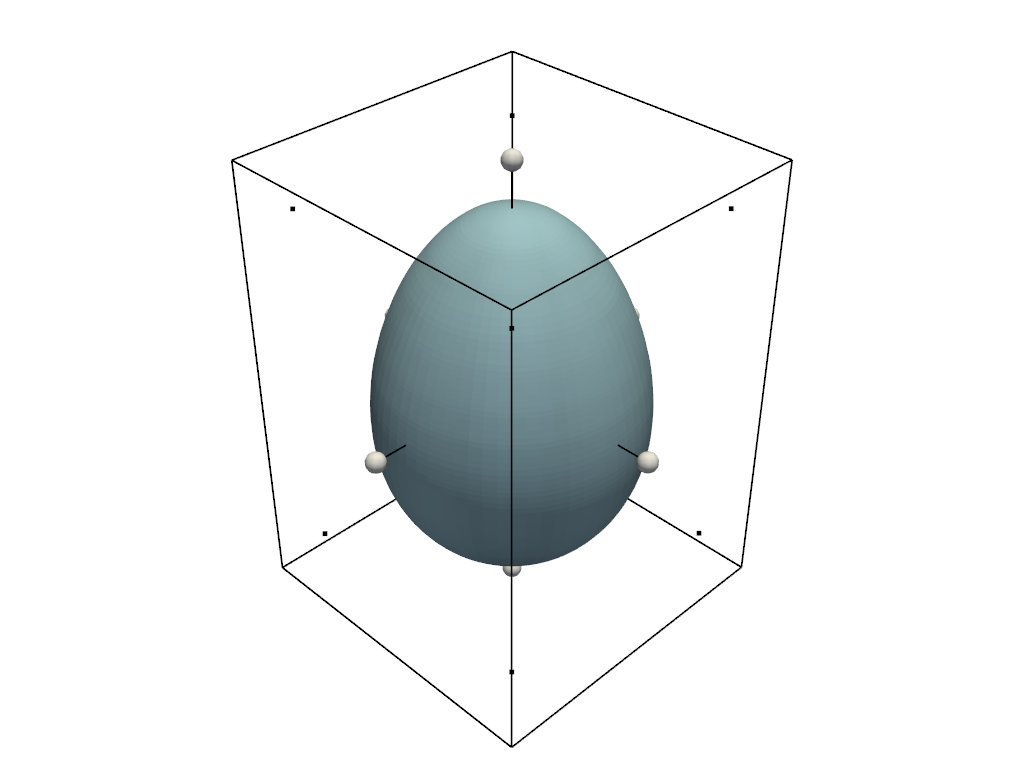

In [9]:
#plot_points_3d(points)
mesh = pv.read(filepath)
def callback(box, _):
    print("Box coordinates:", box.bounds)


p = pv.Plotter() #white canvas
p.add_mesh(mesh) #add mesh
p.add_mesh(newpoints, color='black')
p.add_box_widget(callback=callback) #add widget box
p.show()


In [12]:
def fill_cube_with_points(corner_points, spacing):
    """
    Füllt einen Quader mit gleichmäßig verteilten Punkten.

    :param corner_points: Ein Array der Form (8, 3), das die 8 Eckpunkte des Quaders beschreibt.
    :param spacing: Der Abstand zwischen den Punkten.
    :return: Ein Array der Form (N, 3), das die Koordinaten der Punkte im Quader enthält.
    """
    # Bestimme die min und max Koordinaten des Quaders
    min_corner = np.min(corner_points, axis=0)
    max_corner = np.max(corner_points, axis=0)

    # Erzeuge Gitterpunkte innerhalb des Quaders
    x = np.arange(min_corner[0], max_corner[0] + spacing, spacing)
    y = np.arange(min_corner[1], max_corner[1] + spacing, spacing)
    z = np.arange(min_corner[2], max_corner[2] + spacing, spacing)
    
    xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
    points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

    return points

# Beispiel für Eckpunkte eines Quaders

# Abstandsparameter
spacing = 0.1

# Fülle den Quader mit Punkten
filled_points = fill_cube_with_points(newpoints, spacing)









C:\Users\AlexP\AppData\Roaming\Python\Python312\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


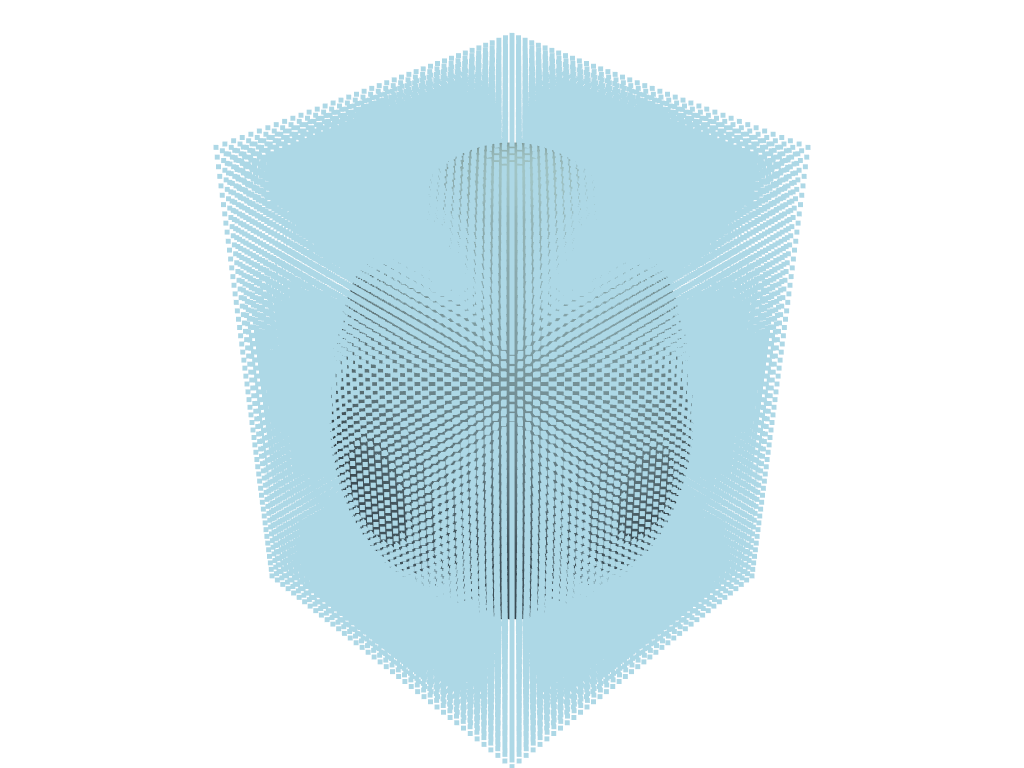

In [13]:
 
# Visualisiere die Punkte
p = pv.Plotter()
point_cloud = pv.PolyData(filled_points)
p.add_mesh(point_cloud, )
p.add_mesh(mesh)
p.show()

In [ ]:
def points_within_boundary(points, corner_points):
    """
    Bestimmt die Punkte innerhalb der Boundary Box.

    :param points: Ein Array der Form (N, 3), das die zu überprüfenden Punkte enthält.
    :param corner_points: Ein Array der Form (8, 3), das die 8 Eckpunkte des Quaders beschreibt.
    :return: Ein Array der Form (M, 3), das die Koordinaten der Punkte innerhalb der Boundary Box enthält.
    """
    min_corner = np.min(corner_points, axis=0)
    max_corner = np.max(corner_points, axis=0)
    
    within_boundary = np.all((points >= min_corner) & (points <= max_corner), axis=1)
    return points[within_boundary]

Schnittmenge = points_within_boundary()